# Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

First thing is to aggregate data into 15min interval and plot it out in different scales (Months, a week, and days). Then, I decompose it to get the information of trend, seasonality, and noise. 

This person has a daily login pattern (seasonality). It means the seasonal period will be (1day * 24h/day * 60min/h)/15min = 96 data points/hour. However, overall trend pattern is constant so it is not a trended seasonal time series. Roughly, the data shows that there is a high demand at 12am and 12pm everyday. According to the trend pattern, every month has 4 plateaus.

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint
from math import sqrt
from sklearn.metrics import mean_squared_error
from collections import Counter
import seaborn as sns
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

In [2]:
# load data
df = pd.read_json('logins.json')

In [3]:
# aggregate data into 15min interval
df.set_index('login_time', inplace=True)
df['count']=1
df_agg = df.resample('15T').sum()
df_agg.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


Text(0, 0.5, 'number of login')

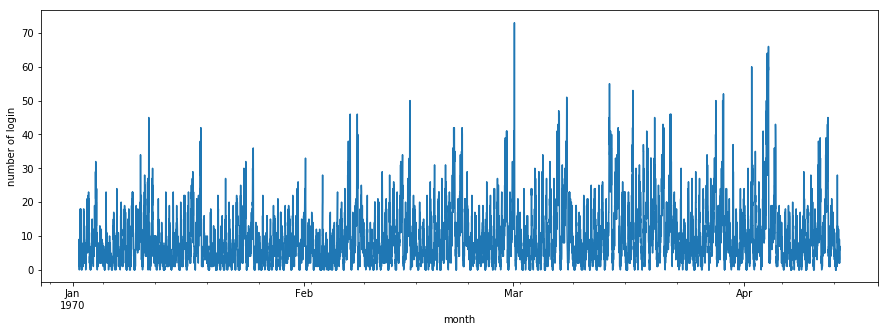

In [4]:
# plot all data
df_agg['count'].plot(figsize=(15,5))
plt.xlabel('month')
plt.ylabel('number of login')

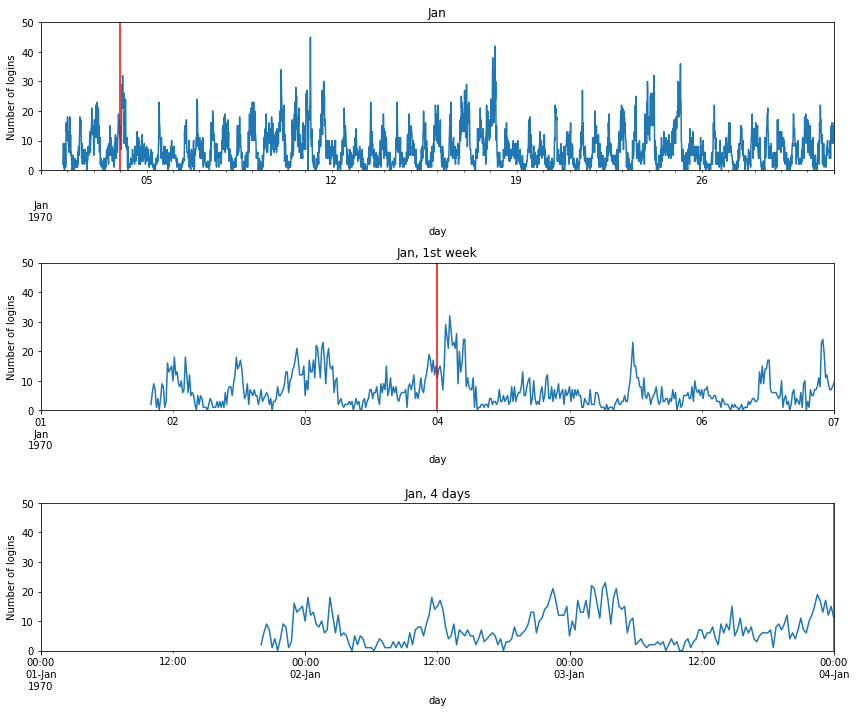

In [9]:

# Enlarge and focus on the Jan
plt.subplot(3, 1, 1)
df_agg['count'].plot(figsize=(12,10))
plt.axis(['1970-01-01', '1970-01-31', 0, 50])
plt.xlabel('day')
plt.ylabel('Number of logins')
plt.title('Jan')
plt.axvline('1970-01-04', color='red')

# Enlarge and focus on the first week of Jan
plt.subplot(3, 1, 2)
df_agg['count'].plot(figsize=(12,10))
plt.axis(['1970-01-01', '1970-01-7', 0, 50])
plt.xlabel('day')
plt.ylabel('Number of logins')
plt.title('Jan, 1st week')
plt.axvline('1970-01-04', color='red')

# Enlarge and focus on the first week of Jan
plt.subplot(3, 1, 3)
df_agg['count'].plot(figsize=(12,10))
plt.axis(['1970-01-01', '1970-01-4', 0, 50])
plt.xlabel('day')
plt.ylabel('Number of logins')
plt.title('Jan, 4 days')
plt.axvline('1970-01-04', color='red')

plt.tight_layout()

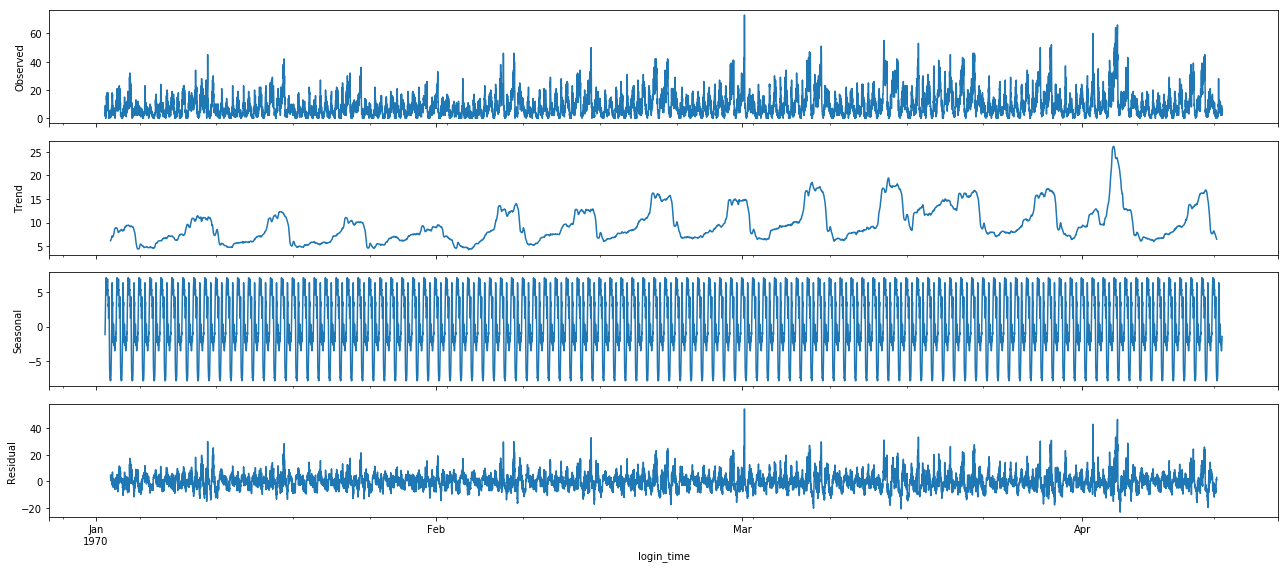

In [10]:
# decompose the data for trend, seasonality, residual
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = seasonal_decompose(df_agg, model='additive', freq=96)
decomposition.plot()
plt.show()

# Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    * a. how you will implement the experiment
    * b. what statistical test(s) you will conduct to verify the significance of the observation
    * c. how you would interpret the results and provide


G: Gothan; M: Metropolis

1. I would collect car's passing frequency on the toll-bridge. It is easy to recognize whether the car is from G or M by its car plate. With above preferred key measures, I can observe population flow before and after the reimbursment.

2. 
   - a. A/B test. Compare passing frequency before and after the reimbursment.
   - b. I would apply t-test (p=0.5) to 4 hypothesis based on the rhythms of theses two cities. The best scenario is to collect at least 3 ~ 6 months data.
     * In weekday's morning, the frequency of people from M to G is X before the reimbursment and the frequency of people from M to G is Y after the reimbursment. Ho: The freuqnecy has no difference between X and Y; Ha: The freuqnecy has a difference between X and Y
     * In weekday's night, the frequency of people from G to M is X before the reimbursment and the frequency of people from G to M is Y after the reimbursment. Ho: The freuqnecy has no difference between X and Y; Ha: The freuqnecy has a difference between X and Y
     * In weekend, the frequency of people from M to G is X before the reimbursment and the frequency of people from M to G is Y after the reimbursment. Ho: The freuqnecy has no difference between X and Y; Ha: The freuqnecy has a difference between X and Y
     * In weekend, the frequency of people from G to M is X before the reimbursment and the frequency of people from G to M is Y after the reimbursment. Ho: The freuqnecy has no difference between X and Y; Ha: The freuqnecy has a difference between X and Y

   - c. The first two hypotheses can indicate which ciyt's people would reflect to the policy more or the same in weekdays' morning or evening. The third and fourth hypotheses can indicate which ciyt's people would reflect to the policy more or the same on weekends.
   

  

# Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider **a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days**.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

    **Ans: 50,000 users are retained. I use imputation to keep all rows and check correlation.**


2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

    **Ans: I have tried 4 different models. Both ensemble models (Randomforest and GradientBoosting) perform the best (accuracy is 90%). KNN model has around 84% accuracy and logistic reggression has around 74% accuracy. I concern a bit about the imbalance labels.**       


3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

    **Ans: From the feature importance, top 3 important features are 'trips_in_first_30_days', 'avg_dist', and 'avg_rating_by_driver'. It indicates that how often usesrs use the bikes in the first 30 days and how long users ride the bikes are both critical. The rating also reflects to the possibility they are gonna keep using the bikes.** 

In [1]:
import json

with open('ultimate_data_challenge.json') as f:
    bike = json.load(f)

In [78]:
df_bike = pd.DataFrame(bike)

In [79]:
df_bike.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [80]:
df_bike.shape

(50000, 12)

In [81]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


### Create our target: retention (1: retention; 0: not retention)
* There are 37,129 retained users and 12,871 non-retained users


In [82]:
df_bike['retention'] = 0

for i in range(len(df_bike)):
    sign_up = df_bike.loc[i, 'signup_date']
    last_trip = df_bike.loc[i, 'last_trip_date']
    if len(pd.date_range(sign_up, last_trip)) > 30:
        df_bike.loc[i, 'retention'] = 1
    else:
        df_bike.loc[i, 'retention'] = 0

In [83]:
df_bike.shape

(50000, 13)

In [84]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
retention                 50000 non-null int64
dtypes: bool(1), float64(6), int64(2), object(4)
memory usage: 4.6+ MB


In [85]:
# quickly check the ratio of retention
Counter(df_bike['retention'])

Counter({1: 37129, 0: 12871})

In [112]:
# drop 'last_trip_date' and 'signup_date'
df_bike = df_bike.drop(['last_trip_date', 'signup_date'], axis=1)

### Handle Nulls
* Impute nulls in 'avg_rating_of_driver' (numeric) by mean 
* Impute nulls in 'avg_rating_by_driver' (numeric) by mean
* Transform nulls in 'phone' to 'none' which means not iphone nor Android

In [77]:
df_bike.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,retention
count,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000
mean,5.460046,4.776446,4.601720,1.073822,8.898709,2.609675,61.254897,0.771311
std,5.145174,0.404606,0.616104,0.198747,18.322061,4.059336,34.813848,0.419993
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,37.500000,1.000000
50%,3.780000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000,1.000000
75%,6.490000,5.000000,5.000000,1.070000,11.100000,3.000000,100.000000,1.000000
max,79.690000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,1.000000


In [91]:
# Nulls imputation

from sklearn.preprocessing import Imputer # change it to "from sklearn import impute.SimpleImputer" after 0.22 version

imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
impute_col = ["avg_rating_by_driver", "avg_rating_of_driver"]
for i in impute_col:
    df_bike[i] = imr.fit_transform(df_bike[[i]]).ravel()

/Users/GaryKao/Desktop/Springboard/env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [93]:
# Transform nulls
df_bike['phone'] = df_bike['phone'].fillna('none')

In [114]:
# make sure the nulls are filled up in 'phone' and the imputation is working
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
phone                     50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
retention                 50000 non-null int64
dtypes: bool(1), float64(6), int64(2), object(2)
memory usage: 3.9+ MB


In [95]:
phone = dict(Counter(df_bike['phone']))

In [96]:
phone

{'iPhone': 34582, 'Android': 15022, 'none': 396}

([<matplotlib.axis.XTick at 0x12f934080>,
 <a list of 3 Text xticklabel objects>)

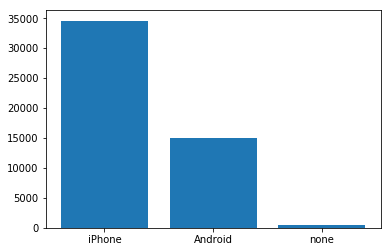

In [97]:
plt.bar(range(len(phone)), list(phone.values()))
plt.xticks(range(len(phone)), list(phone.keys()))

### Correlation heat map
* retention is positively correlated to 'trips_in_first_30_days' and 'ultimate_black_user' and negatively correlated to 'avg_dist' 

In [98]:
cor = df_bike.corr()

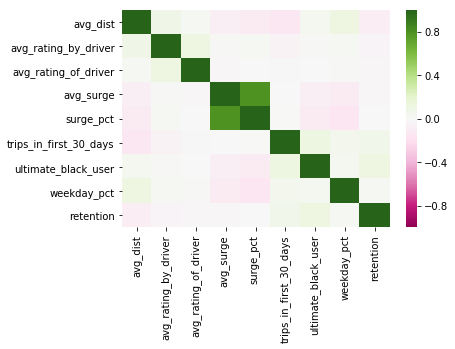

In [99]:
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, cmap='PiYG', vmax=1, vmin=-1) 

### Dummify categoricals

In [115]:
df_bike_dum = pd.get_dummies(df_bike, columns=['city', 'ultimate_black_user', 'phone'], drop_first=True)

In [116]:
df_bike_dum.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,retention,city_King's Landing,city_Winterfell,ultimate_black_user_True,phone_iPhone,phone_none
0,3.67,5.0,4.7,1.10,15.4,4,46.2,1,1,0,1,1,0
1,8.26,5.0,5.0,1.00,0.0,0,50.0,1,0,0,0,0,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,0,0,0,0,1,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,1,1,0,1,1,0
4,3.13,4.9,4.4,1.19,11.8,14,82.4,1,0,1,0,0,0


### Split train and test data & standardize the data

In [117]:
X = df_bike_dum.drop('retention', axis=1)
y = df_bike_dum['retention']

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [119]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

/Users/GaryKao/Desktop/Springboard/env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/GaryKao/Desktop/Springboard/env/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/Users/GaryKao/Desktop/Springboard/env/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


### Feature importance by Randomforest

In [120]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1)
forest.fit(X_train_std, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [121]:
# get importances of each feature
importances = forest.feature_importances_

In [122]:
# get feature name of each column
feat_labels = X_train.columns

In [123]:
# arrange the order of importances from larget to small and extract its index
indices = np.argsort(importances)[::-1]

Text(0.5, 1.0, 'Feature importance derived from Randomforest')

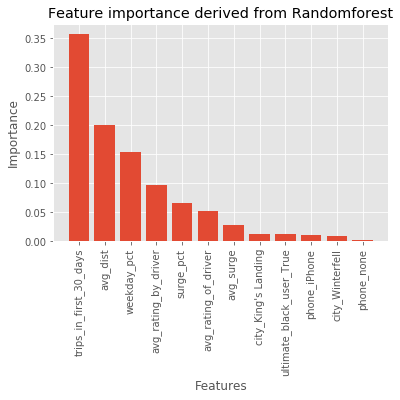

In [124]:
plt.style.use('ggplot')
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature importance derived from Randomforest')

### Models

### Logistic regression

In [141]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C=100, random_state=1, solver='lbfgs')
# train the model
logit.fit(X_train_std, y_train)

# predict and check the accuracy
y_pred = logit.predict(X_test_std)

from sklearn.metrics import accuracy_score
print('The accuracy of logistc regression with C=100 is {}'.format(accuracy_score(y_test, y_pred)))

The accuracy of logistc regression with C=100 is 0.7444666666666667


Text(0.5, 1.0, 'ROC Curve (Logistic regression)')

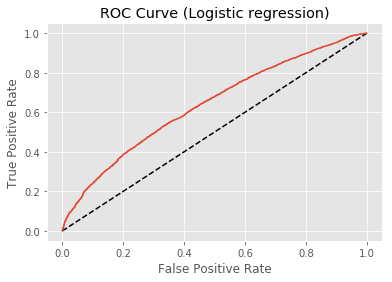

In [142]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logit.predict_proba(X_test_std)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic regression)')

### KNN

In [143]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [145]:
print ('The accuracy of KNN is {}'.format(accuracy_score(y_test, knn.predict(X_test_std))))

The accuracy of KNN is 0.8415333333333334


Text(0.5, 1.0, 'ROC Curve (KNN)')

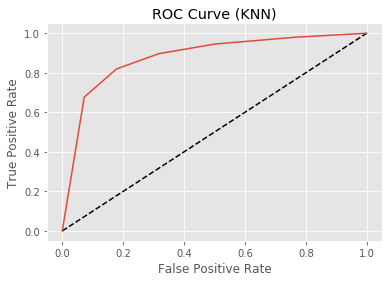

In [147]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test_std)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (KNN)')

### Gradient boosting

In [135]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt=GradientBoostingClassifier(random_state=1, n_estimators=100)
gbrt.fit(X_train_std, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=1,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [137]:
print('The accuracy of Gradient boosting with n_estimators=100 is {}'.format(gbrt.score(X_test_std, y_test)))

The accuracy of Gradient boosting with n_estimators=100 is 0.9045333333333333


Text(0.5, 1.0, 'ROC Curve (Gradient boosting)')

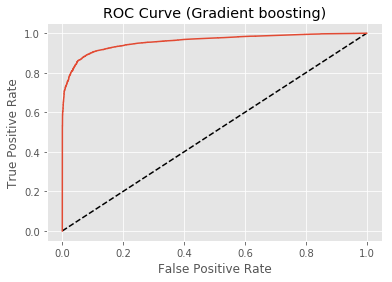

In [140]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = gbrt.predict_proba(X_test_std)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Gradient boosting)')

### Randomforest

In [131]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1)
forest.fit(X_train_std, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [133]:
print('The accuracy of Randomforest with n_estimators=25 and gini is {}'.format(accuracy_score(y_test, forest.predict(X_test_std))))

The accuracy of Randomforest with n_estimators=25 and gini is 0.9006666666666666


Text(0.5, 1.0, 'ROC Curve (Randomforest)')

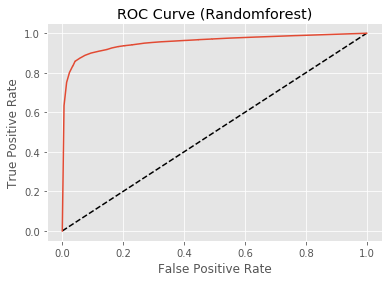

In [139]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = forest.predict_proba(X_test_std)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Randomforest)')